In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

from pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

In [2]:
rcParams['figure.figsize']=10,6

### Loading the Dataset

In [3]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Alternate way to get the dataset

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

df100 = sns.load_dataset('iris')

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Dropping the column Id as it is redundant

In [6]:
df.drop(columns='Id',inplace=True)

In [7]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Checking the shape of the dataset

In [8]:
df.shape

(150, 5)

- The dataset contains 150 rows and 5 columns

### Checking the info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- Our dataset has 4 numerical columns and 1 categorical columns

### Descriptive Statistics

In [10]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- 1.The mean SepalLength is 5.84cm.
- 2.The max SepalLength is 7.9cm.
- 3.The min SepalLength is 4.3cm.
- 4.The mean SepalWidth is 3.054cm.
- 5.The max SepalWidth is 4.4cm.
- 6.The min SepalWidth is 2cm.
- 7.The mean PetalLength is 3.7586cm.
- 8.The max PetalLength is 6.9cm.
- 9.The min PetalLength is 1cm.
- 10.The mean PetalWidth is 1.1987cm.
- 11.The max PetalWidth is 2.5cm.
- 12.The min PetalWidth is 0.1cm.

### Checking for Null Values

In [11]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

- There is no null values present in our dataset

### Checking for duplicates

In [12]:
df.duplicated().sum()

3

### Dropping Duplicate Values

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

- Now,there is no duplicates values present in the dataset

### No. of Samples in each class

In [15]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

- 1.We have 50 samples for versicolor class
- 2.We have 49 samples for verginica class
- 3.We have 48 samples for setosa class

### Exploratory Data Analysis

### Histplot

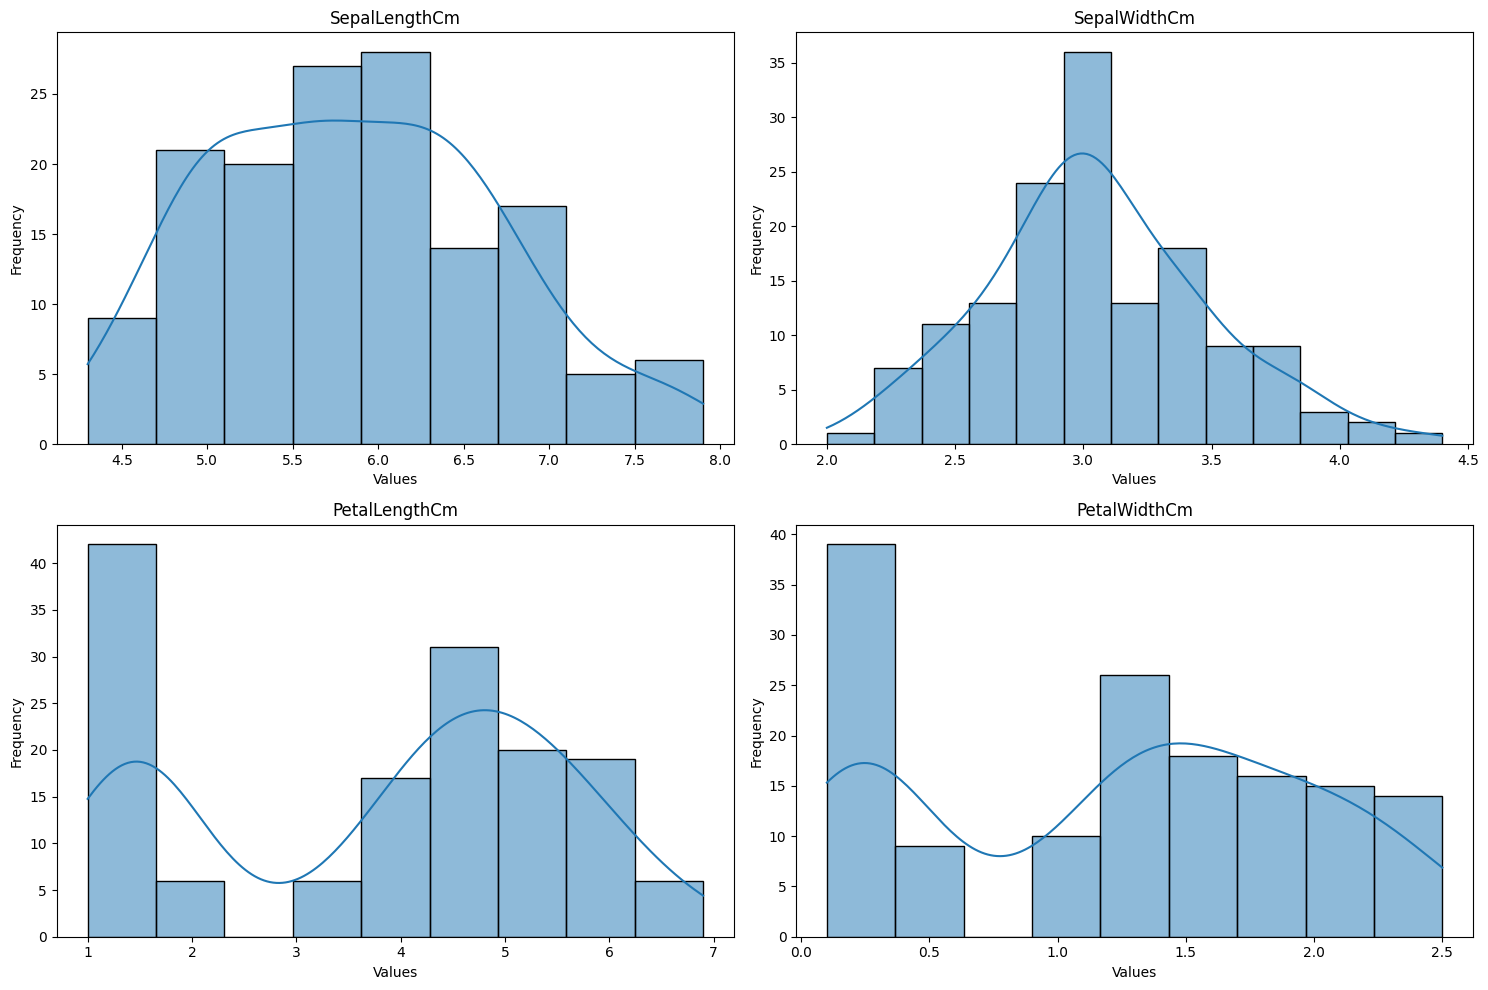

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes = axes.flatten()

for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    sns.histplot(x=df[col], ax=axes[i], kde=True) 
    axes[i].set_title(col)
    axes[i].set_xlabel("Values")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


- 1.The count of flower having SepalLength around 6-6.5cm is highest above 25.
- 2.The count of flower having SepalLength around 7-7.5 cm is lowest below 5.
- 3.The count of flower having SepalWidth above 3 cm is highest around 35.
- 4.The count of flower having PetalLength  around 1 cm is highest above 40.
- 5.The count of flower having PetalWidth below 0.5 cm is highest around 40.

### CountPlot

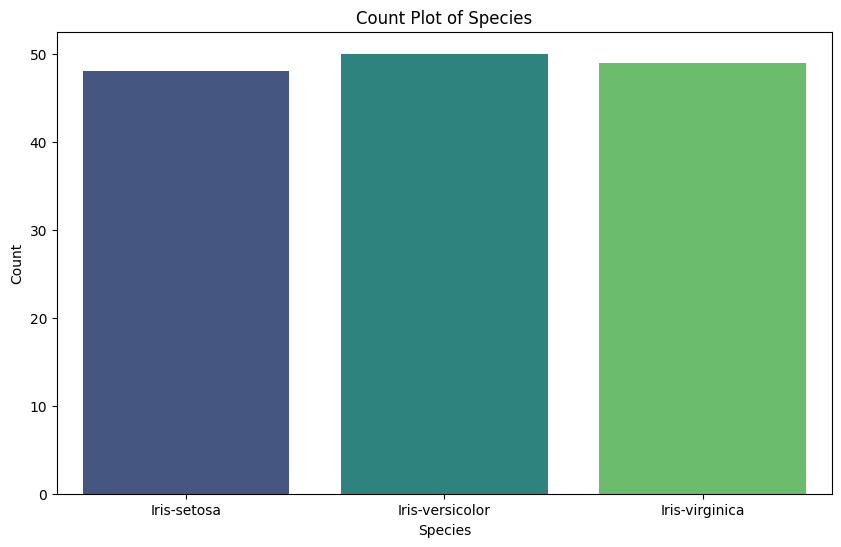

In [17]:
sns.countplot(x='Species',data=df,palette='viridis')
plt.title("Count Plot of Species")
plt.xlabel("Species")
plt.ylabel('Count')

plt.show()

- 1.The count of flower Iris-versicolor is maximum at 50.
- 2.The count of flower Iris-setosa is minimum below 48.

### KDE and Box Plot

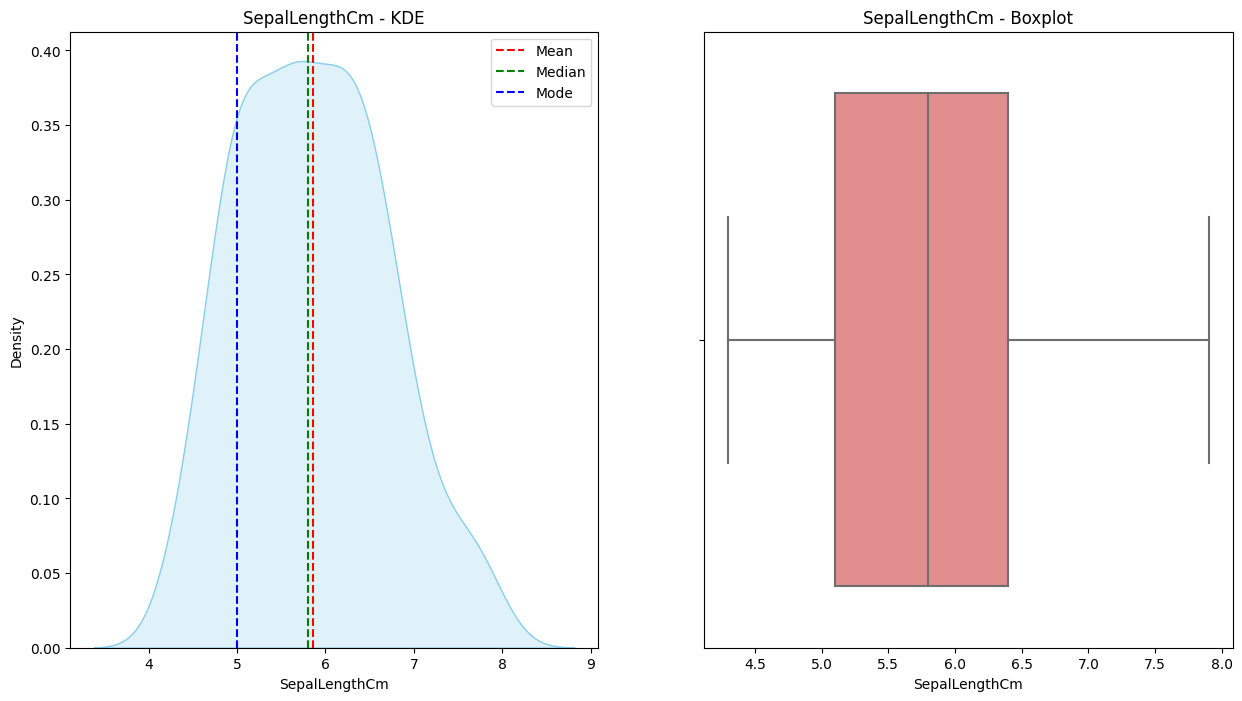

Skewness: 0.29255956516307163
Kurtosis: -0.5569564812003911
Mean: 5.8564625850340155
Median: 5.8
Mode: 5.0
Standard Deviation: 0.8290998607345104
Variance: 0.6874065790699845
Coefficient of Variation: 14.15700772772366


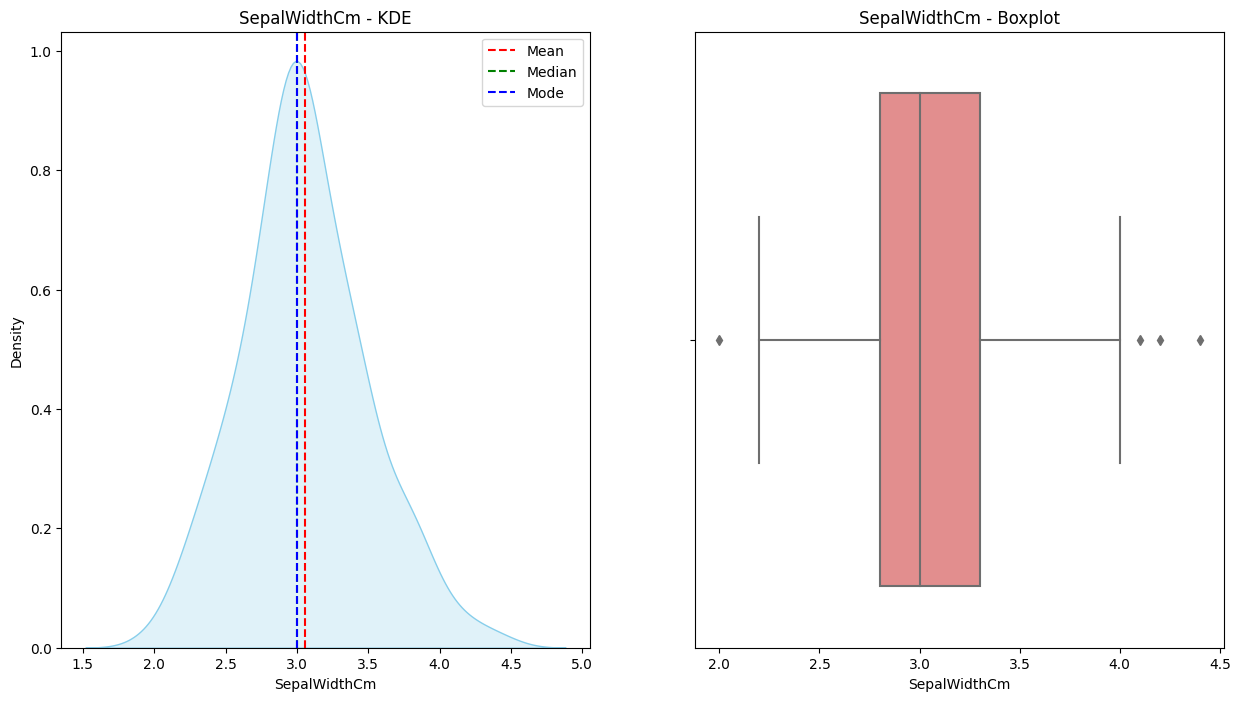

Skewness: 0.3243506195620299
Kurtosis: 0.24683840744328434
Mean: 3.0557823129251713
Median: 3.0
Mode: 3.0
Standard Deviation: 0.4370087068034353
Variance: 0.19097660982201087
Coefficient of Variation: 14.301041829943223


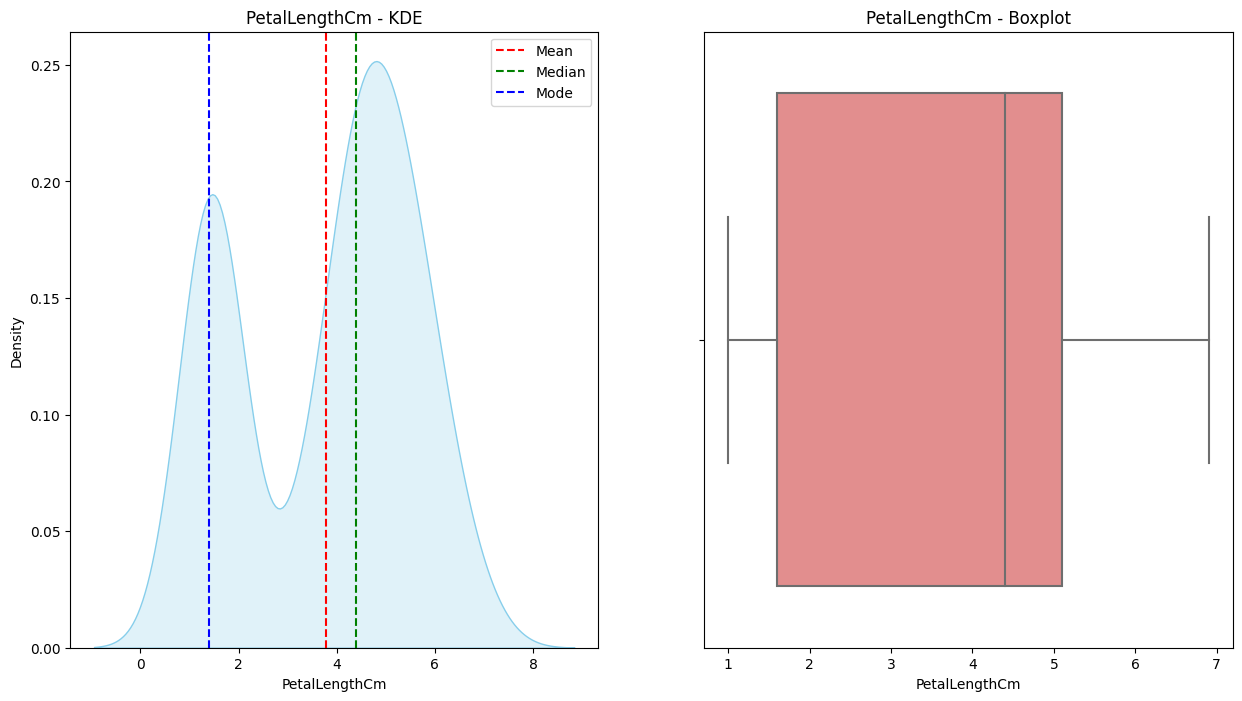

Skewness: -0.2937634574565383
Kurtosis: -1.3744621135069286
Mean: 3.78027210884354
Median: 4.4
Mode: 1.4
Standard Deviation: 1.7591108999509792
Variance: 3.0944711583263445
Coefficient of Variation: 46.533975579052324


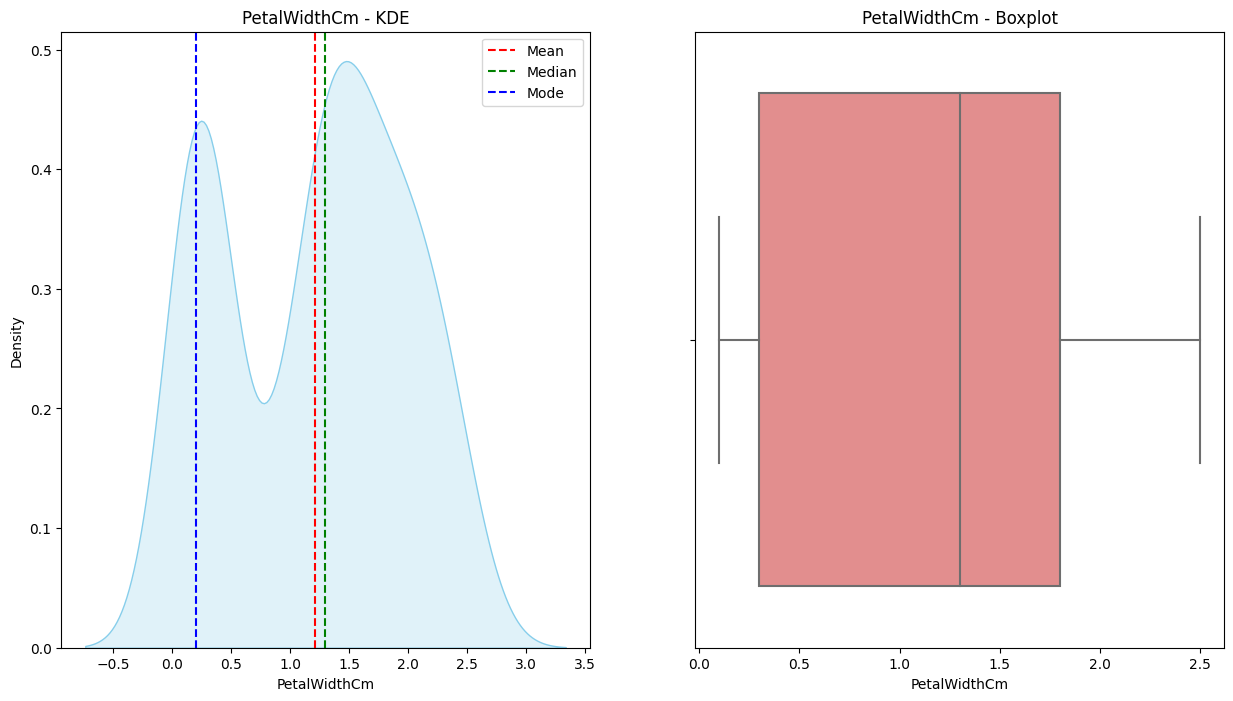

Skewness: -0.11347861374619836
Kurtosis: -1.3177600111364542
Mean: 1.2088435374149666
Median: 1.3
Mode: 0.2
Standard Deviation: 0.7578742052400408
Variance: 0.5743733109682235
Coefficient of Variation: 62.69415203730215


In [18]:
def plot_column_analysis(df, column_name):
    plt.figure(figsize=(15, 8))

    # KDE Plot
    plt.subplot(1, 2, 1)
    sns.kdeplot(df[column_name], shade=True, color='skyblue')
    plt.axvline(df[column_name].mean(), color='r', linestyle='--', label='Mean')
    plt.axvline(df[column_name].median(), color='g', linestyle='--', label='Median')
    plt.axvline(df[column_name].mode()[0], color='b', linestyle='--', label='Mode')
    plt.title(f'{column_name} - KDE')
    plt.legend()

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column_name], color='lightcoral')
    plt.title(f'{column_name} - Boxplot')

    plt.show()

    # Summary Statistics
    print('Skewness:', df[column_name].skew())
    print('Kurtosis:', df[column_name].kurt())
    print('Mean:', df[column_name].mean())
    print('Median:', df[column_name].median())
    print('Mode:', df[column_name].mode()[0])
    print('Standard Deviation:', df[column_name].std())
    print('Variance:', df[column_name].var())
    print('Coefficient of Variation:', (df[column_name].std() / df[column_name].mean()) * 100)

df_num = df.select_dtypes(include=np.number).columns


plot_column_analysis(df, df_num[0])
plot_column_analysis(df, df_num[1])
plot_column_analysis(df, df_num[2])
plot_column_analysis(df, df_num[3])

#### SepalLengthcm Column

- 1.SepalLengthcm column is approximately symmetrical as skewness is 0.292.
- 2.SepalLengthcm column is having slightly negative kurtosis(-0.5569).
- 3.The mean(5.856), median(5.8), and mode(5.0) are close, suggesting a central tendency without significant skewness.
- 4.The standard deviation(0.829) and coefficient of variation(14.157) indicate moderate variability in sepal lengths.

#### SepalWidthcm Column

- 1.The 'SepalWidthCm' distribution is slightly right-skewed (positive skewness of 0.324) with slightly heavier tails than a normal distribution (positive kurtosis 0.2468).
- 2.The mean(3.055), median(3.0), and mode(3.0) are close, suggesting a central tendency without significant skewness.
- 3.The standard deviation(0.437) and coefficient of variation(14.301) indicate moderate variability in sepal widths.

#### PetalLengthcm Column 

- 1.The 'PetalLengthCm' distribution is slightly left-skewed (skewness of -0.293) with relatively lighter tails (negative kurtosis of -1.374).
- 2.The mean(3.780), median(4.4), and mode(1.4) are not extremely close, suggesting some influence from values on the left side.
- 3.The standard deviation(1.7591) and coefficient of variation(46.533) indicate a moderate to high variability in petal lengths.
- 4.The dual modal peak in the KDE suggests the presence of two subgroups or patterns in the data.

#### PetalWidthcm Column

- 1.The 'PetalWidthCm' distribution is slightly left-skewed (skewness of -0.113) with lighter tails than a normal distribution (kurtosis of -1.317).
- 2.The dual modal peak in the KDE suggests the presence of two subgroups or patterns in the data.
- 3.The mean(1.208), median(1.3) and mode(0.2) differences suggest potential variability in the data.
- 4.The standard deviation(0.757) and coefficient of variation(62.694) indicate higher variability in petal widths.

### Pie Plot

<Axes: ylabel='Species'>

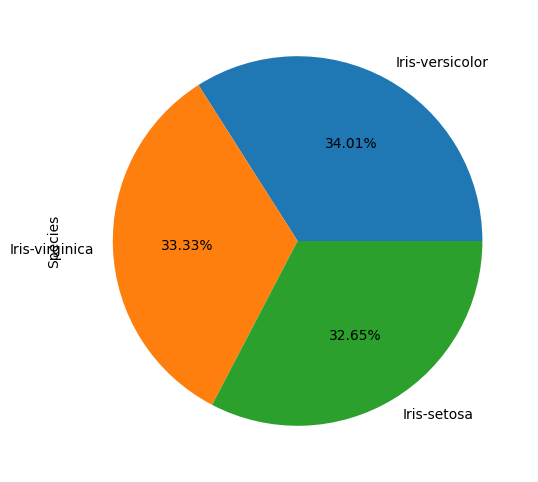

In [19]:
df['Species'].value_counts().plot(kind='pie',autopct='%.2f%%')

- 1.The flower type Iris-setosa is 32.65% of the total flowers.
- 2.The flower type Iris-versicolor is 34.01% of the total flowers.
- 3.The flower type Iris-verginica is 33.33% of the total flowers.

In [20]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

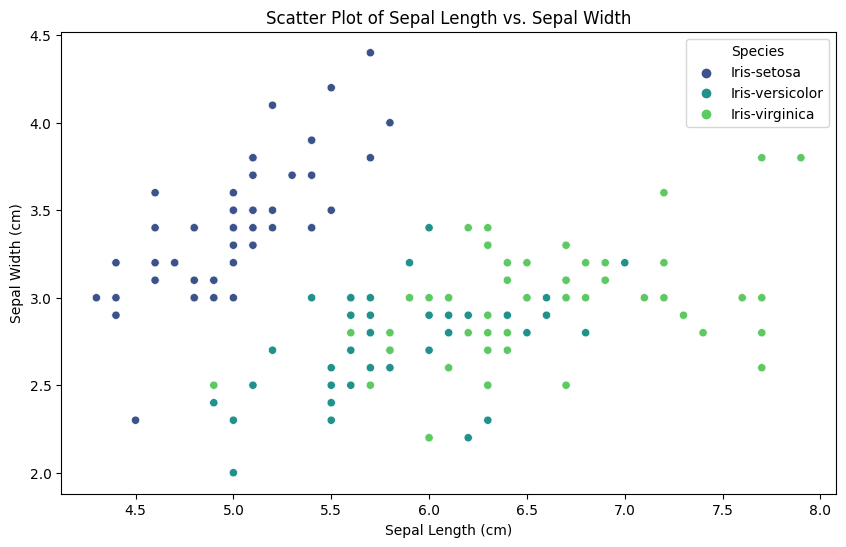

In [21]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df, palette='viridis')

plt.title('Scatter Plot of Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

- 1.The majority of Iris-setosa has Sepal Width aroud 3.5cm and Sepal Length around 5cm.
- 2.The flower which has highest Sepal Length belongs to Iris-virginica class.
- 3.The flower having maximum Sepal Width is of Iris-setosa class.

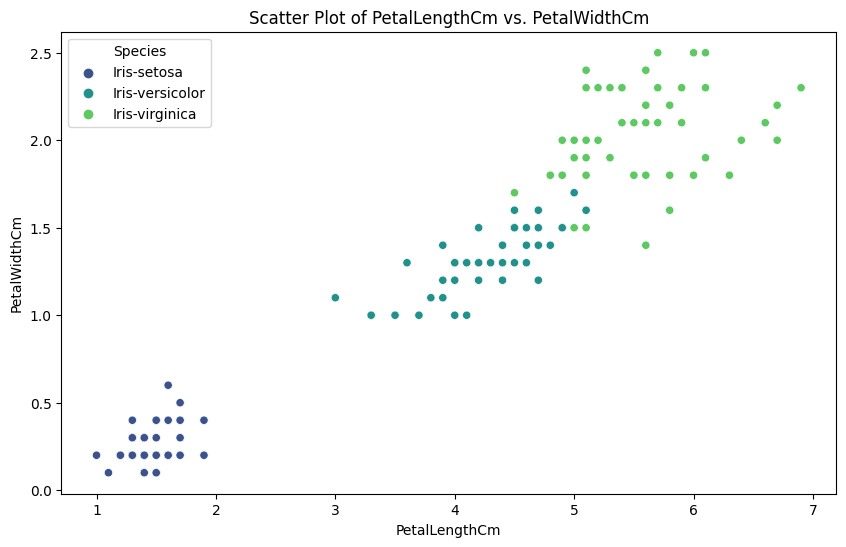

In [22]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df, palette='viridis')

plt.title('Scatter Plot of PetalLengthCm vs. PetalWidthCm')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.show()

- 1.The Iris-setosa type of flower is having less PetalWidth and PetalLength among others.
- 2.The Iris-virginica type of flower is having maximum PetalWidth and PetalLength.

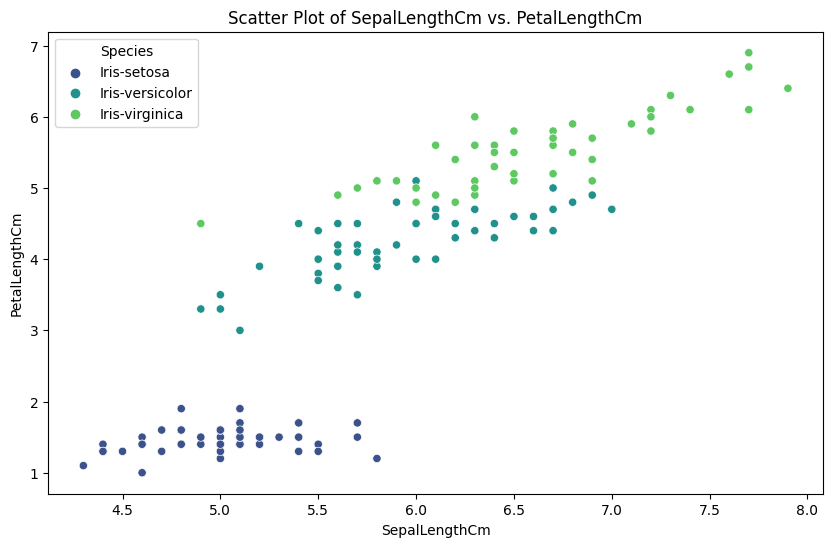

In [23]:
sns.scatterplot(x='SepalLengthCm', y='PetalLengthCm', hue='Species', data=df, palette='viridis')

plt.title('Scatter Plot of SepalLengthCm vs. PetalLengthCm')
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.show()

- 1.Iris-setosa flower least PetalLength among others.
- 2.Iris-virginica flower has maximum SepalLength and maximum PetalLength.

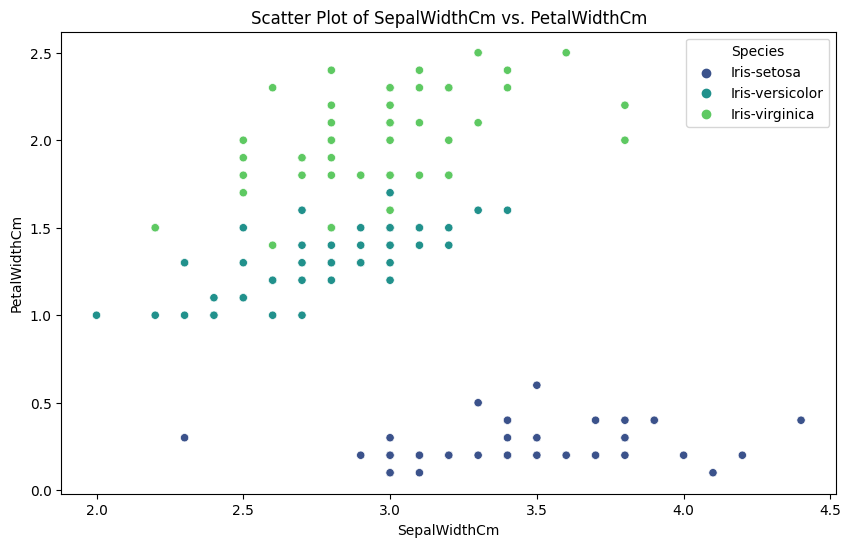

In [24]:
sns.scatterplot(x='SepalWidthCm', y='PetalWidthCm', hue='Species', data=df, palette='viridis')

plt.title('Scatter Plot of SepalWidthCm vs. PetalWidthCm')
plt.xlabel('SepalWidthCm')
plt.ylabel('PetalWidthCm')
plt.show()

- 1.The Iris-setosa flower type has more SepalWidth corresponding to its PetalWidth.

### Correlation Heatmap

<Axes: >

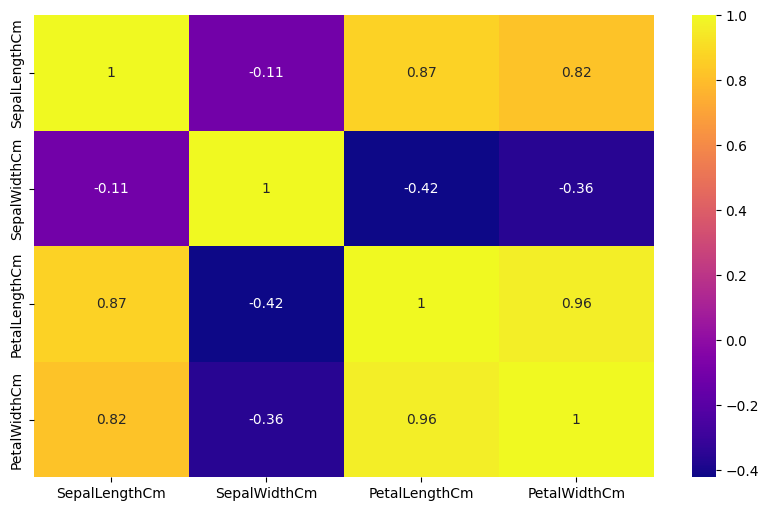

In [25]:
sns.heatmap(data=df.corr(),annot=True,cmap='plasma')

- 1.There is high positive correalation between PetalWidthcm and SepalLengthcm column of 0.82.
- 2.There is high positive correalation between PetalLengthcm and SepalLengthcm column of 0.87.
- 3.There is high positive correalation between PetalLengthcm and PetalWidthcm column of 0.96

In [26]:
df_num=df.select_dtypes(include=np.number).columns
df_cat=df.select_dtypes(include=['object']).columns

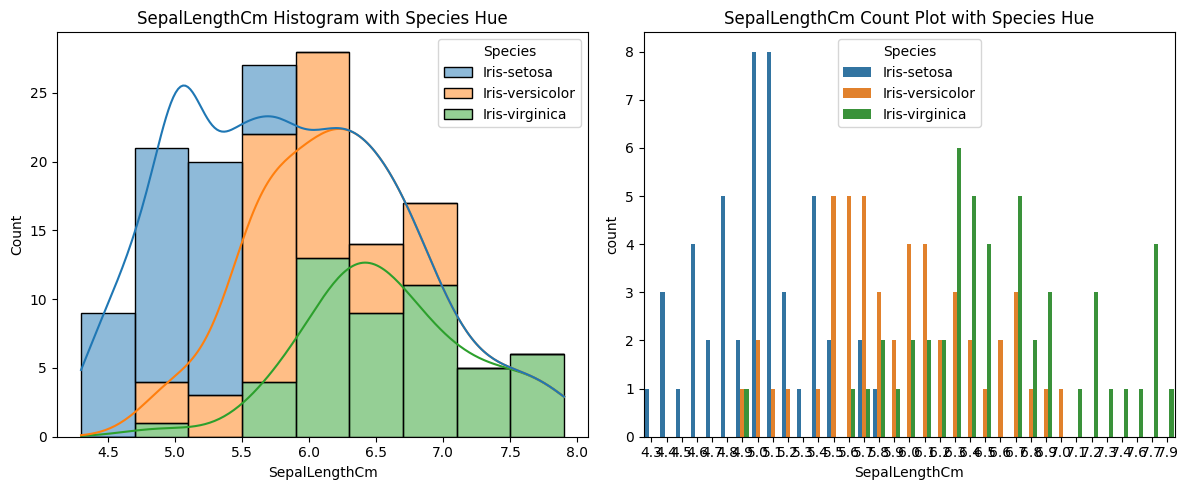

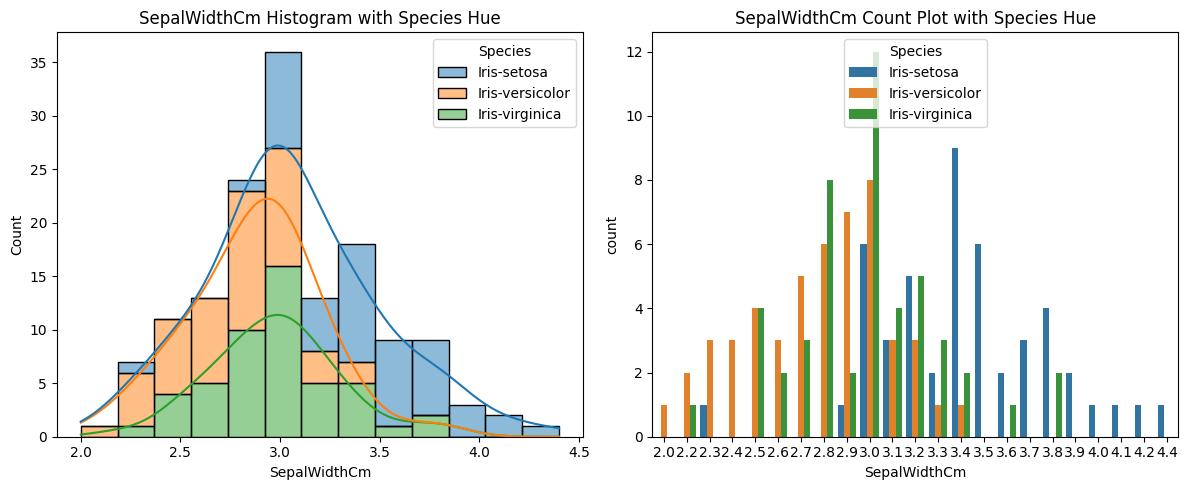

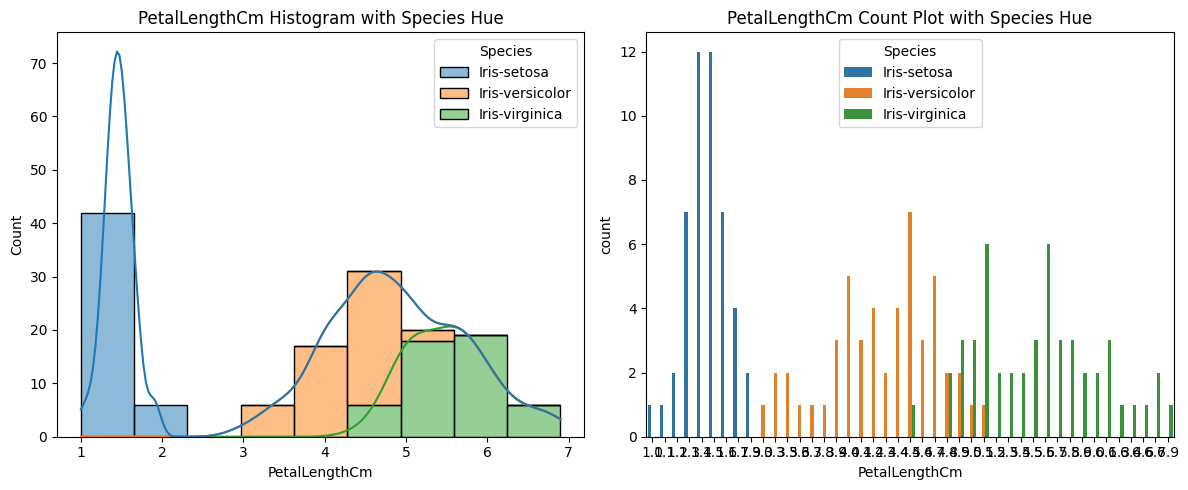

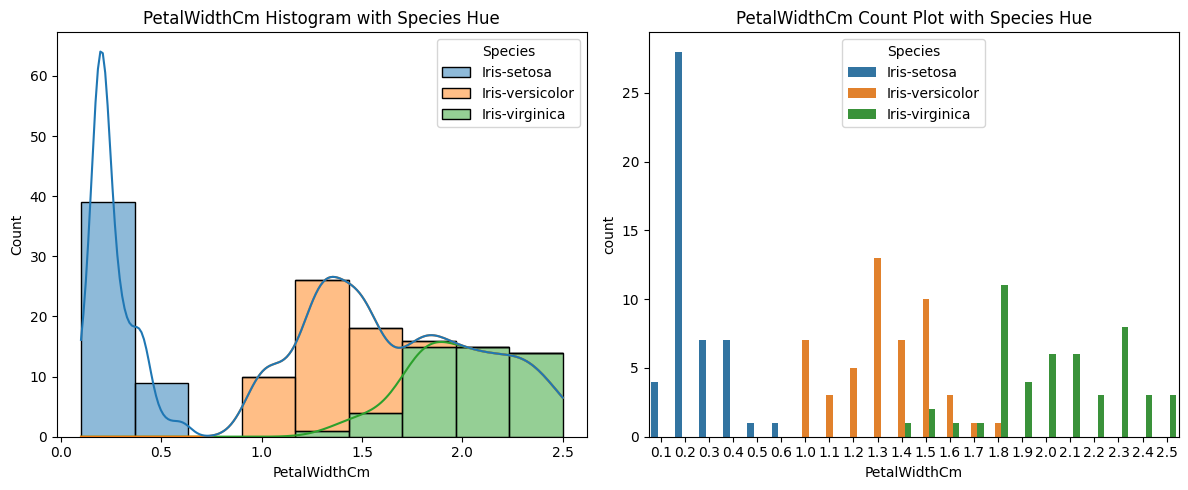

In [27]:
for i in df_num:
    plt.figure(figsize=(12, 5))

    # Select a single categorical column for hue
    selected_cat_col = df_cat[0]  
    
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=i, hue=selected_cat_col, multiple="stack", kde=True)
    plt.title(f'{i} Histogram with {selected_cat_col} Hue')

    plt.subplot(1, 2, 2)
    sns.countplot(data=df, x=i, hue=selected_cat_col)
    plt.title(f'{i} Count Plot with {selected_cat_col} Hue')

    plt.tight_layout()
    plt.show()

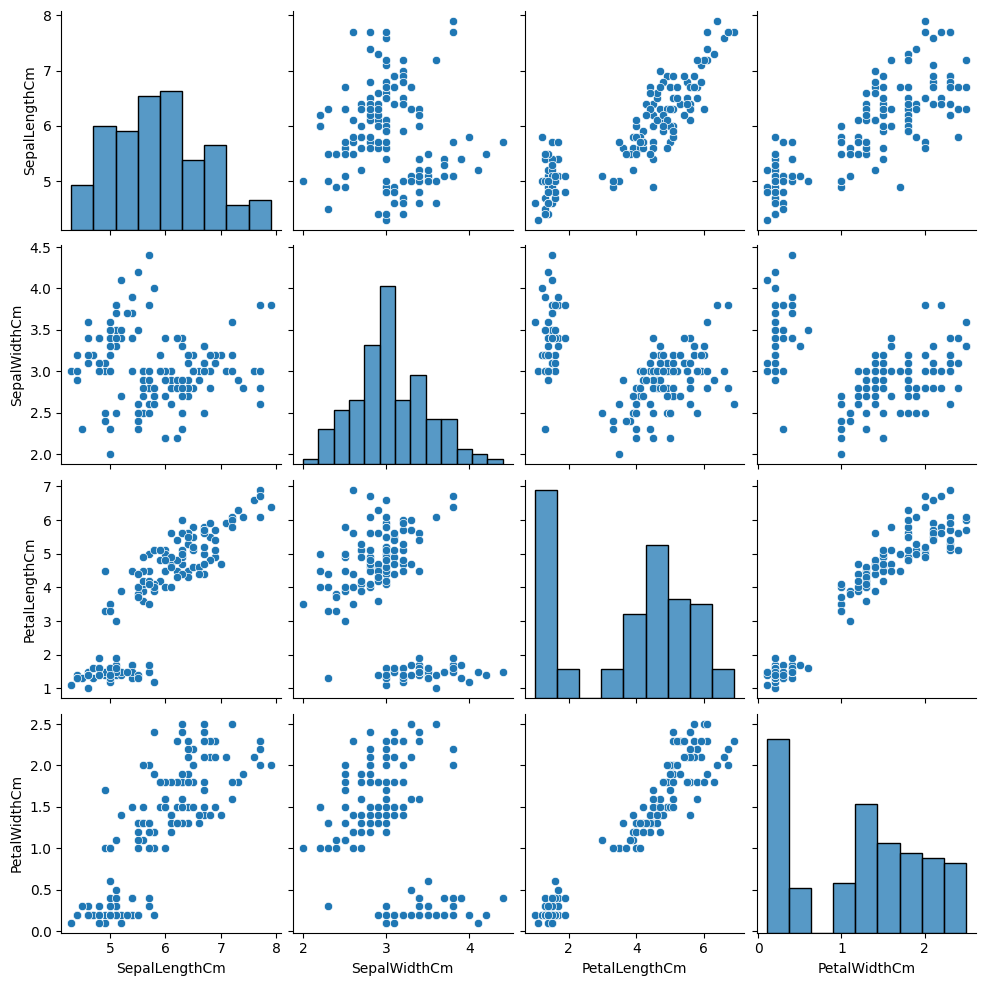

In [28]:
sns.pairplot(data=df)

### Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

In [30]:
df['Species'].value_counts()

1    50
2    49
0    48
Name: Species, dtype: int64

### Model Training

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
#Splitting the data
x=df.drop(['Species'],axis=1)
y=df['Species']

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [34]:
print('x_train shape: ',x_train.shape)
print('x_test shape: ',x_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)

x_train shape:  (102, 4)
x_test shape:  (45, 4)
y_train shape:  (102,)
y_test shape:  (45,)


### Building first model - Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr=LogisticRegression()

model=lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)

print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.85      0.92      0.88        12
           2       0.93      0.88      0.90        16

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



- Accuracy obtained is 93%
- It performs well for all classes, with particularly high scores for Iris-setosa(Class 0).

### Building second model - DecisionTreeClassifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
model_dt = dt.fit(x_train, y_train)
pred_test_dt = dt.predict(x_test)

print(classification_report(y_test, pred_test_dt))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.85      0.92      0.88        12
           2       0.93      0.88      0.90        16

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



- Accuracy is 93%.
- It performs well for all classes, with particularly high scores for Iris-setosa (Class 0).

### Building  third model - RandomForestClassifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
model_rf = rf_classifier.fit(x_train, y_train)
pred_test_rf = rf_classifier.predict(x_test)

print(classification_report(y_test, pred_test_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      0.92      0.92        12
           2       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



- The Random Forest model demonstrates high accuracy (96%) on the test set.
- It performs well for all classes, with particularly high scores for Iris-setosa (Class 0).

### Building  fourth model - KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
model_knn=knn.fit(x_train,y_train)
pred_test_knn=knn.predict(x_test)

print(classification_report(y_test,pred_test_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      0.92      0.92        12
           2       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



- The KNN model demonstrates high accuracy (96%) on the test set.
- It performs well for all classes, with particularly high scores for Iris-setosa (Class 0).
- The F1-Score provides a good balance between precision and recall for each class.

### Building  fifth model - (SVM) Support Vector Machine 

In [39]:
from sklearn.svm import SVC  # Support Vector Classification

svm_classifier = SVC(kernel='linear', random_state=50) 
model_svm = svm_classifier.fit(x_train, y_train)
pred_test_svm = svm_classifier.predict(x_test)

print(classification_report(y_test, pred_test_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.92      0.96        12
           2       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



- The SVM model with a linear kernel demonstrates excellent performance for the Iris dataset.
- It achieves high accuracy (98%) and performs well for all classes, showing a good balance between precision and recall.
- The model is well-suited for the task of classifying iris species, providing an overall robust and accurate solution.

**In terms of accuracy SVM have the highest accuracy scores (0.98)** 

### The End